In [1]:
%cd C:\Users\yukir\Documents\GitHub\Sign_Recognition\py
from basic_preprocessing import *
from image_preprocessing import *
from machine_learning import *
%cd C:\Users\yukir\Documents\Monicas_workspace\Sign detection\image_input

C:\Users\yukir\Documents\GitHub\Sign_Recognition\py
C:\Users\yukir\Documents\Monicas_workspace\Sign detection\image_input


In [ ]:
img_path = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\image_input\\image'
img_list = get_file_list(img_path)
img_list = get_img(img_path)
print(img_list[1].shape)
image_lists = []
for i in img_list:
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    image_lists.append(i)
for i in image_lists:
    show(i)

In [ ]:
test = image_lists[5]
img_test = test.copy()
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
# show(img_test)
kernel = np.ones((3,3), np.uint8)
edges1 = cv2.Canny(img_test, 50,400)
# edges1 = cv2.erode(edges1, kernel, iterations=1)
edges1 = cv2.dilate(edges1, kernel, iterations=1)
show(edges1)
contours, hierarchy = cv2.findContours(edges1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont = cv2.drawContours(img_test, contours, -1, (0,0,255),1)
show(cont)
print(len(contours))

5 7 190 186
43 24 118 136


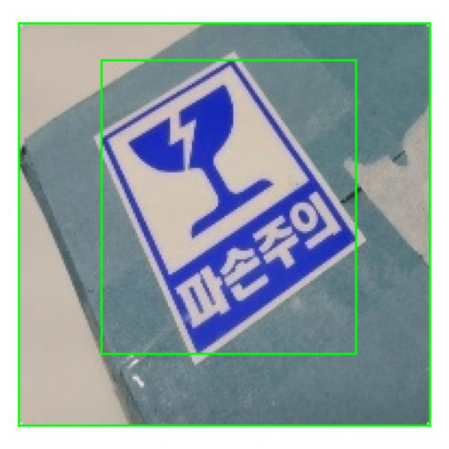

In [3]:
test = image_lists[5]
img_test = test.copy()
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
# show(gray)
_, thr = cv2.threshold(gray, 0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
# show(thr)
_, labels, stats, cetroids = cv2.connectedComponentsWithStats(thr)
for x, y, w, h, cnt in stats:
    # print(h,w)
    if(h,w) > (100, 100) and (h,w) <(200,200):
        cv2.rectangle(img_test, (x,y,w,h), (0,255,0),1)
        print(x,y,w,h)
        
show(img_test)

23


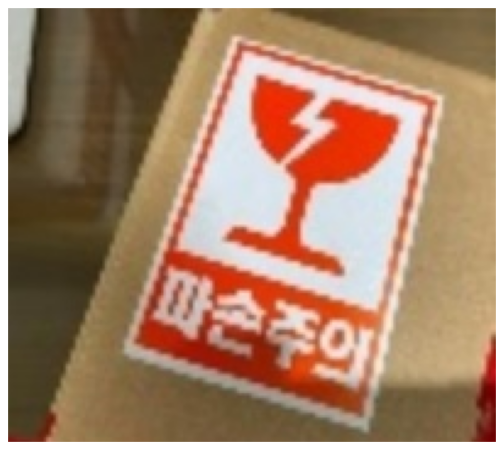

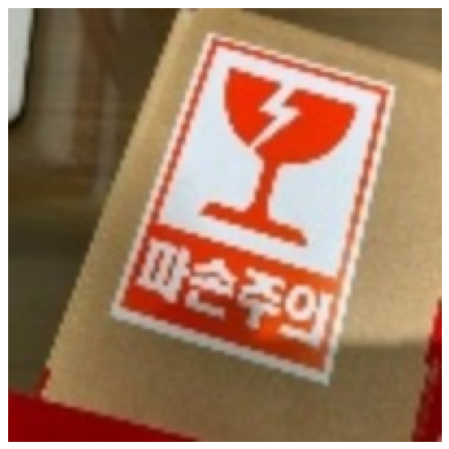

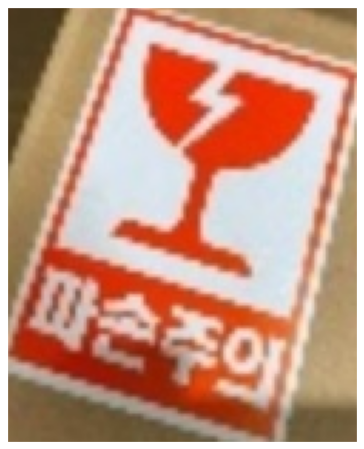

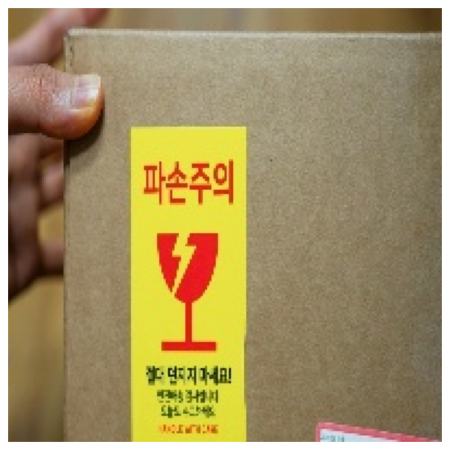

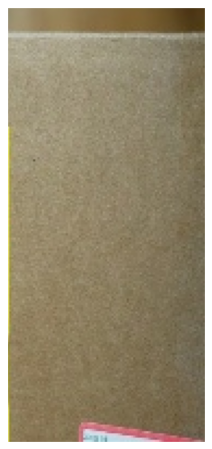

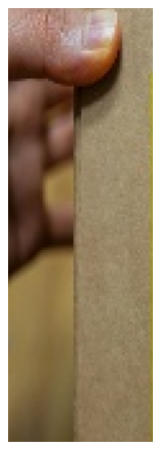

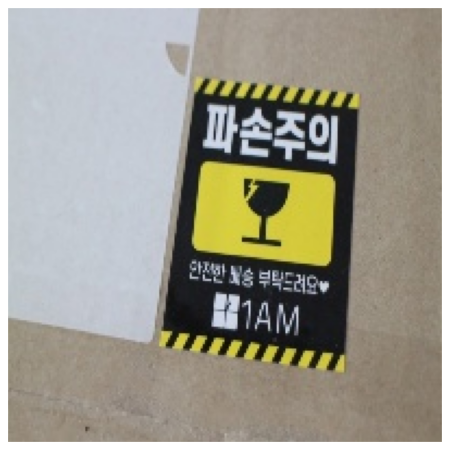

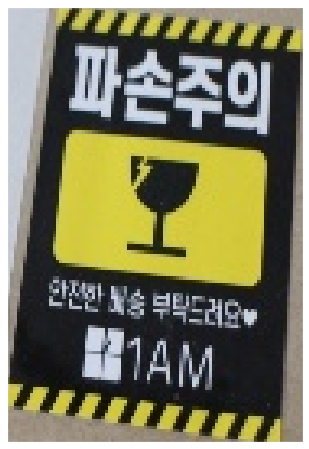

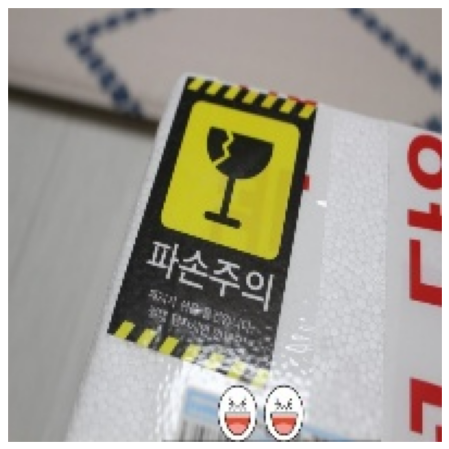

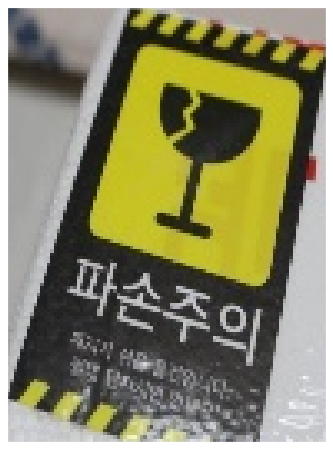

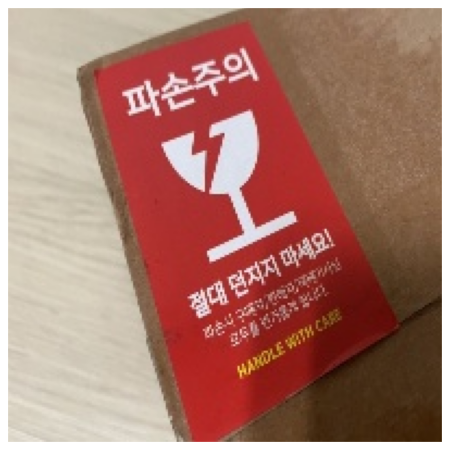

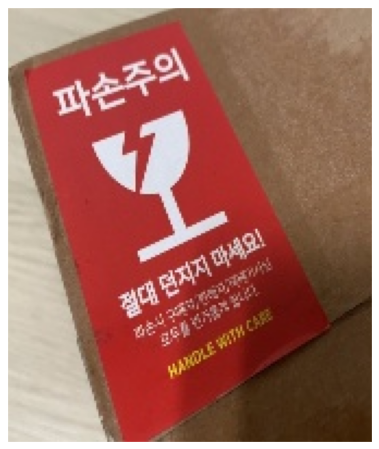

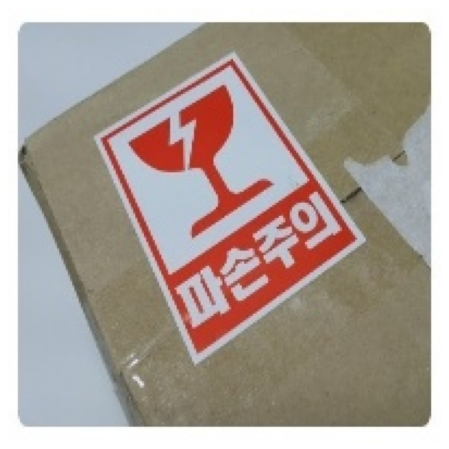

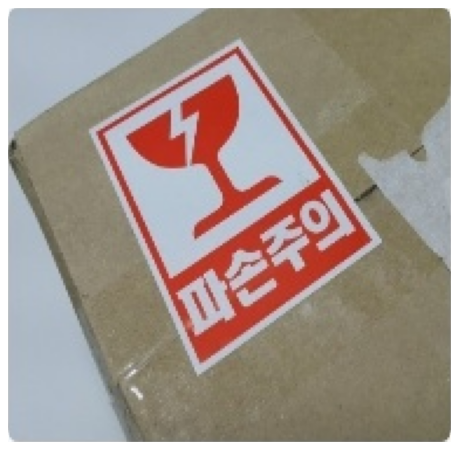

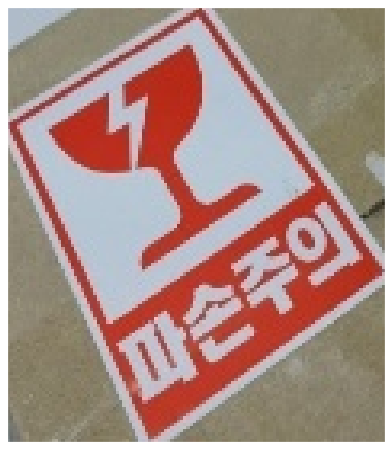

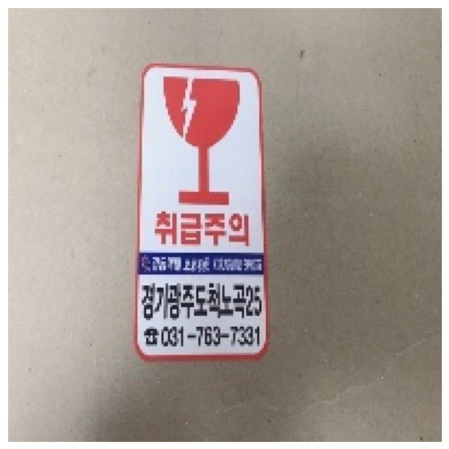

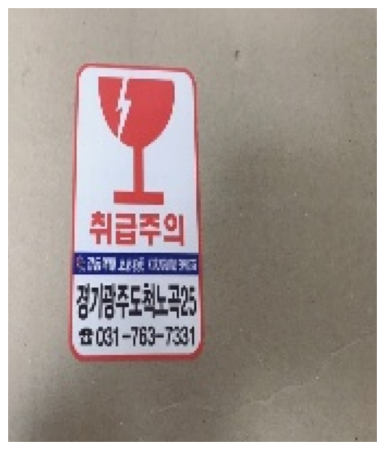

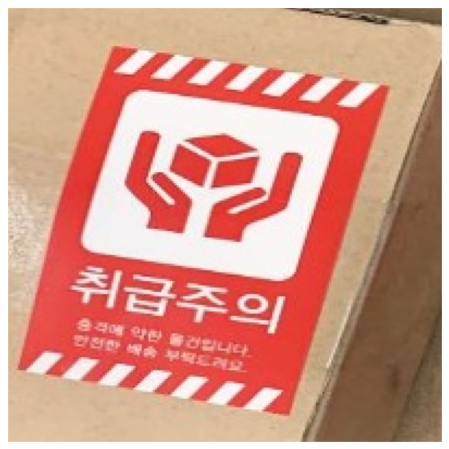

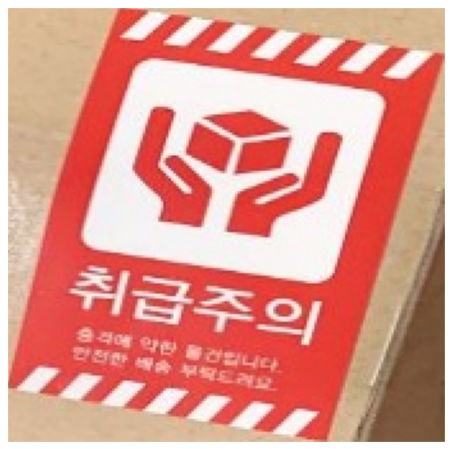

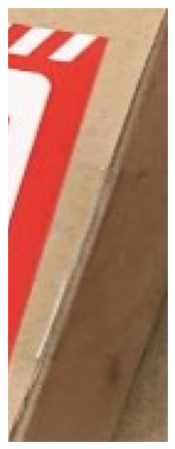

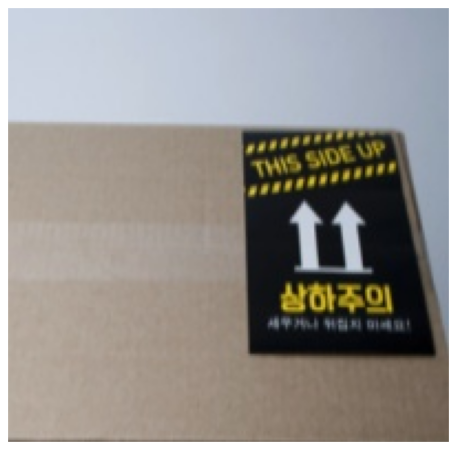

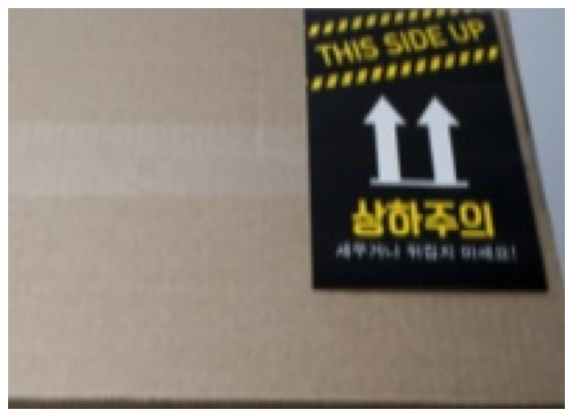

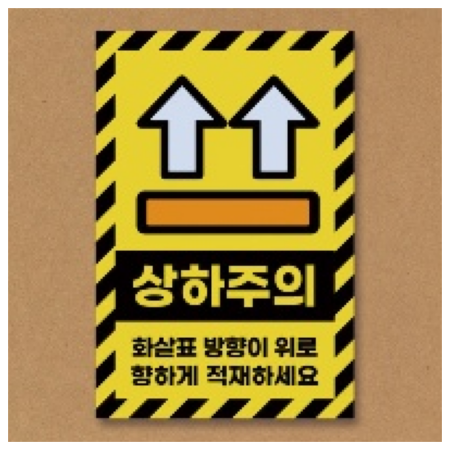

In [39]:
markers = []

for num, i in enumerate (image_lists):
    img_test = image_lists[num].copy()
    # show(img_test)
    gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
    # show(gray)
    _, thr = cv2.threshold(gray, 0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
    # show(thr)
    _, labels, stats, cetroids = cv2.connectedComponentsWithStats(thr)
    coordinate = []
    for x, y, w, h, cnt in stats:
        # print(h,w)
        if(h,w) > (120, 120) and (h,w) <(2001,200):
            cv2.rectangle(img_test, (x,y,w,h), (0,255,0),1)
            # show(img_test)
            # print(x,y,w,h)
            coordinate.append(list(map(int, [x,y,w,h])))
    # print(len(coordinate))

    for i in coordinate:
        x,y,w,h = i
        mark_img = image_lists[num][y:y+h, x:x+w]
        markers.append(mark_img)
print(len(markers))
for i in markers:
    show(i)
    

In [ ]:
roi = img_list[-1][y:y+h, x:x+w]
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
# print(roi)
show(roi)

In [81]:
coordinate

[[5, 7, 190, 186], [43, 24, 118, 136]]

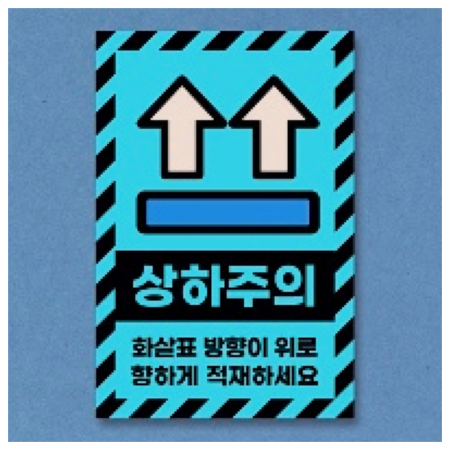

In [60]:
show(img_list[9])